<a href="https://colab.research.google.com/github/SoterX/InteractingWaves/blob/main/plotpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install ipympl;
!git clone https://github.com/SoterX/InteractingWaves/tree/main

from google.colab import output
output.enable_custom_widget_manager()

ERROR: Operation cancelled by user
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import os
import csv
from natsort import natsorted # pip install natsort
# interacting figures
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({
    "axes.grid" : True,
    "axes.xmargin" : 0.02,
    "axes.ymargin" : 0.02,
    "axes.zmargin" : 0.02,
    "axes.labelsize" : 16,
    "axes.linewidth" : 1.2,
    "font.size" : 12,
    "grid.alpha" : 0.5,
    "grid.color": "0.8",
    "grid.linestyle": "-",
    "grid.linewidth": 2,
    "lines.linewidth": 2,
    "lines.color": "g",
    "xtick.direction" : 'in',
    "xtick.major.size": 5,
    "xtick.labelsize": 12,
    "xtick.top" : True,
    "xtick.major.width": 1.5,
    "ytick.direction" : 'in',
    "ytick.major.size": 5,
    "ytick.labelsize": 12,
    "ytick.major.width": 1.5,
    "ytick.right" : True
})

## Figures of merit

### Case S1-W2

In [17]:
print('load the data:')
patho = './InteractingWaves/LinearPolarizedInteracting'
for i in range(len(os.listdir(patho))):
    print(str(i) + ') ' + os.listdir(patho)[i])
num = int(input())
pth = patho + '/' + os.listdir(patho)[num] + '/'
fldrlst = natsorted(os.listdir(pth))
# loading data for trivial case S1 - W1 axis
dataS = []
dataW = []
# The loaded data will have the first step to be
for filename in fldrlst:
    if filename[0]=='S':
        dat = []
        with open(os.path.join(pth,filename), newline='') as f:
            reader = csv.reader(f)
            dat = np.array(list(reader))
        dataS.append(dat)
    elif filename[0]=='W':
        dat = []
        with open(pth + filename, newline='') as f:
            reader = csv.reader(f)
            dat = np.array(list(reader))
        dataW.append(dat)
# We write the z coordinate based on the system steps and z
a = pth.find('zf_')
b = pth.find('__nst')
zs = np.linspace(0, float(pth[a+3:b]),len(dataS[0][0]))
# saving the range of gains we used in the simulation
gstr = [fldrlst[i].removesuffix('.csv') for i in range(int(len(fldrlst)/2))]
gs = [float(x[8:]) for x in gstr]
xS = [[[float(x) for x in dataS[n][m]] for m in range(1,len(dataS[0]))] for n in range(len(dataS))] # rewriting the loaded variables in float form
xgS = [[[xS[i][j][k] for i in range(len(xS))] for j in range(len(xS[0]))] for k in range(len(xS[0][0]))]# writing data as a function of g
xW = [[[float(x) for x in dataW[n][m]] for m in range(1,len(dataW[0]))] for n in range(len(dataW))]
xgW = [[[xW[i][j][k] for i in range(len(xW))] for j in range(len(xW[0]))] for k in range(len(xW[0][0]))]
print('num =',num)

load the data:
0) λ_1.2__χ_1.4__χp_1.6__S2_1.0__W1_1.0__zf_10.0__nstep_4.0
1) λ_1.2__χ_1.4__χp_1.6__S1_1.0__W2_1.0__zf_10.0__nstep_4.0
2) λ_1.2__χ_1.4__χp_1.6__S1_1.0__W2_-1.0__zf_10.0__nstep_4.0
3) λ_1.2__χ_1.4__χp_1.6__S2_1.0__W1_-1.0__zf_10.0__nstep_4.0
0
num = 0


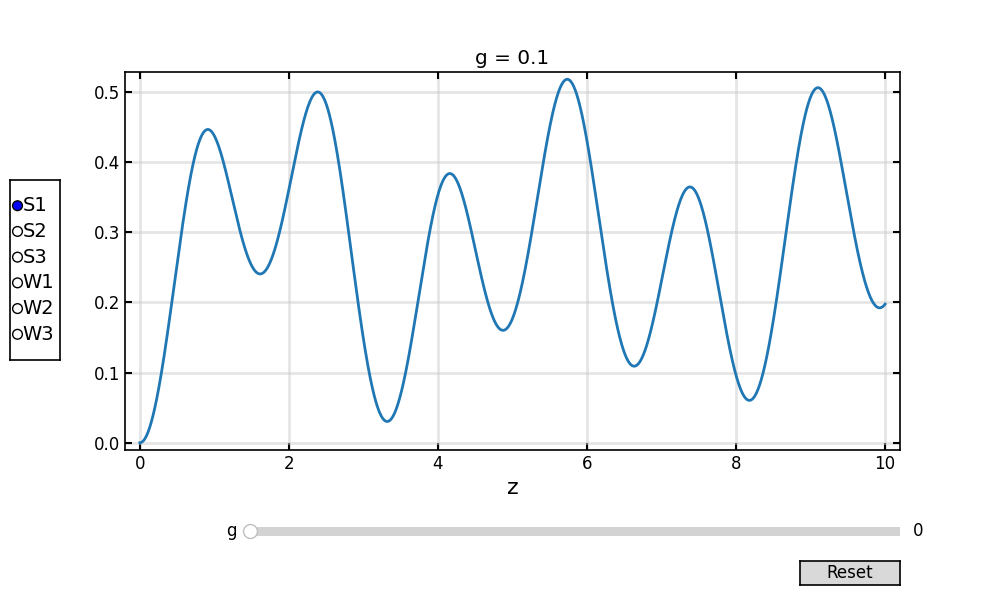

In [20]:
# Plotting the evolution of interacting waves in a medium
plt.close()

#opening the figure
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel(r'$z$')

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(bottom=0.25)

# initialize parameters
g0 = 0
var_0 = 0
fiel_0 = 0
var = 0
gain = 0
fiel = 0

ax.plot(zs, xS[g0][var_0])
ax.set_xlabel('z')
ax.set_title('g = '+ str(gs[gain]))

# Define an axes area and draw a slider in it
gs_slider_ax  = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor='k')
gs_slider = Slider(gs_slider_ax, 'g', 0, len(gs)-1, valinit=g0, valfmt='%i')

# Define second slider for the polarization component S1, S2 or S3
#var_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor='k')
#var_slider = Slider(var_slider_ax, 'var', 0, 2, valinit=var_0, valfmt='%i')

# Add a set of buttons for changing variable
var_change_ax = fig.add_axes([0.01, 0.4, 0.05, 0.3])
var_change = RadioButtons(var_change_ax,
                           ('S1', 'S2', 'S3', 'W1', 'W2', 'W3'),
                           label_props={'fontsize': [14, 14, 14]},
                            active=0)

def ys(gon, vor, fld):
    if fld == 0:
        return xS[gon][vor]
    elif fld == 1:
        return xW[gon][vor]

def var_change_click(label):
    varDict = {'S1': 0, 'S2': 1, 'S3': 2,
               'W1': 0, 'W2': 1, 'W3': 2}
    fldDict = {'S1': 0, 'S2': 0, 'S3': 0,
               'W1': 1, 'W2': 1, 'W3': 1}
    global var
    global fiel
    var = varDict[label]
    fiel = fldDict[label]
    ydata = ys(gain, var, fiel)
    ax.cla()
    ax.plot(zs, ydata)
    ax.set_title('g = '+ str(gs[gain]))
    fig.canvas.draw()
var_change.on_clicked(var_change_click)

# Define the action for modifying the line when any slider's value changes
def update(val):
    global gain
    gain = int(gs_slider.val)
    ydata = ys(gain, var, fiel)
    ax.cla()
    ax.plot(zs, ydata)
    ax.set_title('g = '+ str(gs[gain]))
    fig.canvas.draw_idle()
gs_slider.on_changed(update)
#var_slider.on_changed(update)


# Define the reset buttons
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', hovercolor='0.96')
def reset_button_on_clicked(mouse_event):
    gs_slider.reset()
    #var_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)


plt.show()

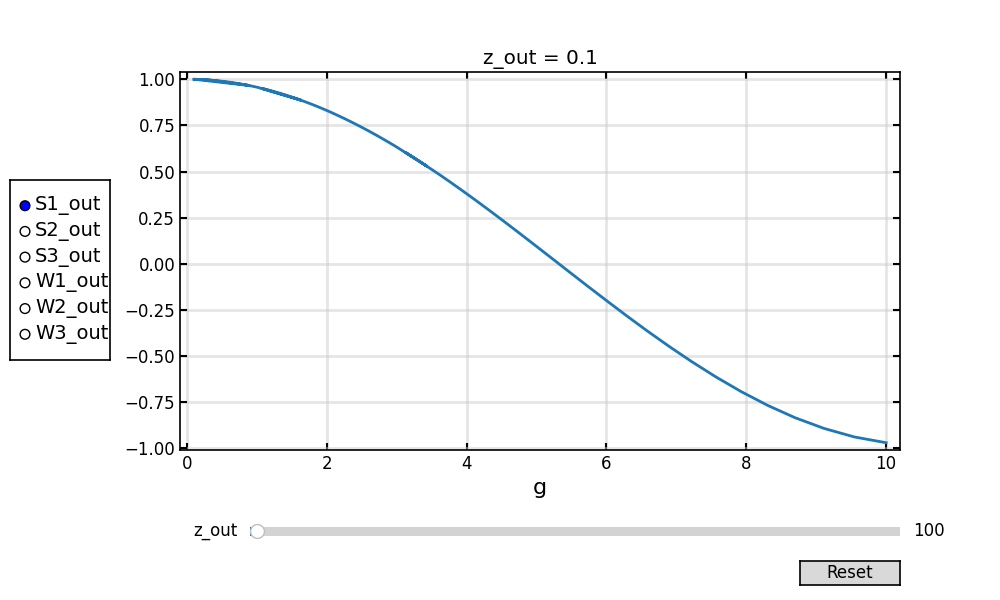

In [ ]:
# Plotting the output for given medium length
# Plotting
plt.close()

#opening the figure
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel(r'$g$')

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(bottom=0.25)

# initialize parameters
z0 = 100
var_0 = 0
fiel_0 = 0
var = 0     # stokes component to plo
zed = 0     # fix z out
fiel = 0    # switch between S and W

ax.plot(gs, xgS[z0][var_0])
ax.set_xlabel('g')
ax.set_title('z_out = '+ str(zs[z0]))

# Define an axes area and draw a slider in it
zed_slider_ax  = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor='k')
zed_slider = Slider(zed_slider_ax, 'z_out', 0, len(zs)-1, valinit=z0, valfmt='%i')

# Define second slider for the polarization component S1, S2 or S3
#var_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor='k')
#var_slider = Slider(var_slider_ax, 'var', 0, 2, valinit=var_0, valfmt='%i')

# Add a set of buttons for changing variable
var_change_ax = fig.add_axes([0.01, 0.4, 0.1, 0.3])
var_change = RadioButtons(var_change_ax,
                           (r'S1_out', r'S2_out', r'S3_out', r'W1_out', r'W2_out', r'W3_out'),
                           label_props={'fontsize': [14, 14, 14]},
                            active=0)

def ygs(zon, vor, fld):
    if fld == 0:
        return xgS[zon][vor]
    elif fld == 1:
        return xgW[zon][vor]

def var_change_click(label):
    varDict = {'S1_out': 0, 'S2_out': 1, 'S3_out': 2,
               'W1_out': 0, 'W2_out': 1, 'W3_out': 2}
    fldDict = {'S1_out': 0, 'S2_out': 0, 'S3_out': 0,
               'W1_out': 1, 'W2_out': 1, 'W3_out': 1}
    global var
    global fiel
    var = varDict[label]
    fiel = fldDict[label]
    ydata = ygs(zed, var, fiel)
    ax.cla()
    ax.plot(gs, ydata)
    ax.set_title('z_out = '+ str(zs[zed]))
    fig.canvas.draw()
var_change.on_clicked(var_change_click)

# Define the action for modifying the line when any slider's value changes
def update(val):
    global zed
    zed = int(zed_slider.val)
    ydata = ygs(zed, var, fiel)
    ax.cla()
    ax.plot(gs, ydata)
    ax.set_title('zf = '+ str(zs[zed]))
    fig.canvas.draw_idle()
zed_slider.on_changed(update)
#var_slider.on_changed(update)


# Define the reset buttons
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', hovercolor='0.96')
def reset_button_on_clicked(mouse_event):
    zed_slider.reset()
    #var_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

plt.subplots_adjust(left=0.18)

plt.show()